In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [48]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [49]:
names = ["20240717_activation_WT4A_control_1", "20240718_activation_WT4A_qE_act_1", "20240719_activation_WT4A_qE_act_2"]


results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))

In [50]:
results[0]

,Record,Actinic,F_max,F_stat,F_0,phi_stat,phi_0,NPQ,ETR
0,AL0,0,1.000000,0.273249,0.271527,0.726751,0.728473,0.000000,0.000000
1,AL10,10,0.872357,0.339118,0.274020,0.611262,0.685885,0.146320,6.112624
2,AL20,20,0.858325,0.414961,0.287820,0.516545,0.664672,0.165060,10.330908
3,AL30,30,0.783099,0.437567,0.280209,0.441236,0.642179,0.276978,13.237083
4,AL40,40,0.754008,0.464367,0.286391,0.384135,0.620175,0.326245,15.365398
5,AL60,60,0.706208,0.497813,0.269150,0.295090,0.618880,0.416013,17.705429
6,AL90,90,0.680525,0.546859,0.272186,0.196416,0.600035,0.469455,17.677421


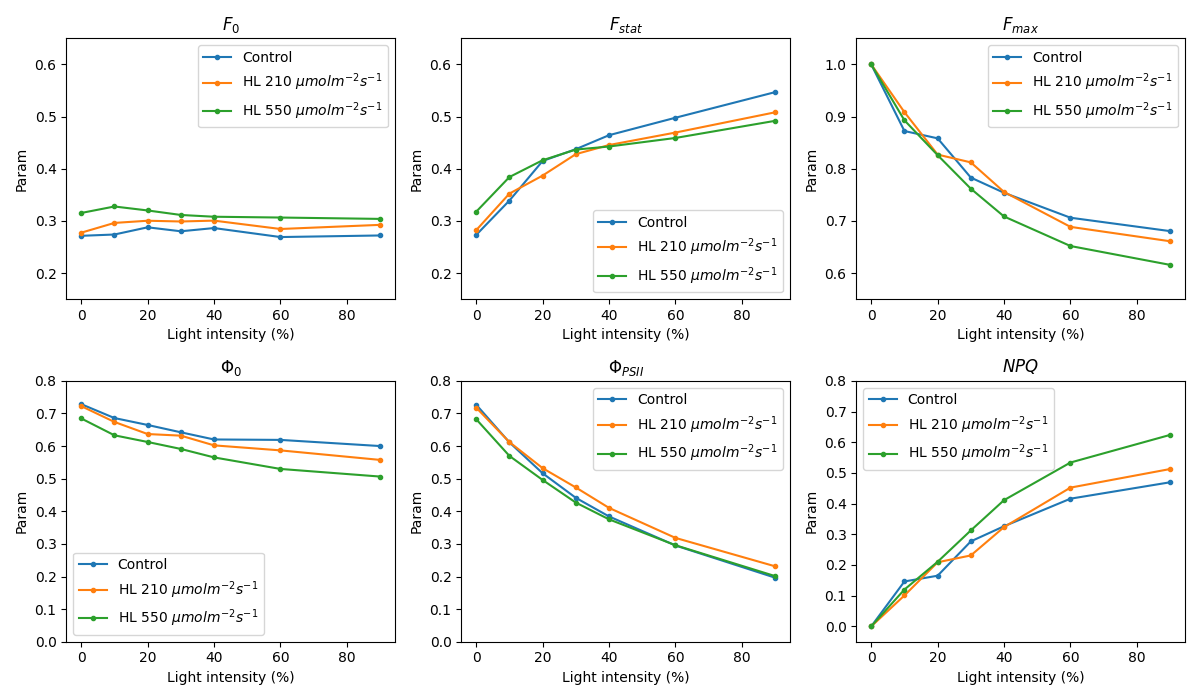

In [54]:
fig, ax = plt.subplots(2, 3, figsize=(12, 7))
labels = ["Control", "HL 210 $µmol m^{-2} s^{-1}$", "HL 550 $µmol m^{-2} s^{-1}$"]
for i, result in enumerate(results):
    ax[0,0].plot(result.Actinic, result.F_0, '-o', markersize=3, label = labels[i])
    ax[0,1].plot(result.Actinic, result.F_stat, '-o', markersize=3, label = labels[i])
    ax[0,2].plot(result.Actinic, result.F_max, '-o', markersize=3, label = labels[i])
    ax[1,0].plot(result.Actinic, result.phi_0, '-o', markersize=3, label = labels[i])
    ax[1,1].plot(result.Actinic, result.phi_stat, '-o', markersize=3, label = labels[i])
    ax[1,2].plot(result.Actinic, result.NPQ, '-o', markersize=3, label = labels[i])

ax[0,0].set_title("$F_0$")
ax[0,1].set_title("$F_{stat}$")
ax[0,2].set_title("$F_{max}$")
ax[1,0].set_title("$\Phi_0$")
ax[1,1].set_title("$\Phi_{PSII}$")
ax[1,2].set_title("$NPQ$")

ax[0,0].set_ylim(0.15, 0.65)
ax[0,1].set_ylim(0.15, 0.65)
ax[0,2].set_ylim(0.55, 1.05)
ax[1,0].set_ylim(0, 0.8)
ax[1,1].set_ylim(0, 0.8)
ax[1,2].set_ylim(-0.05, 0.8)

[axis.set_xlabel("Light intensity (%)") for axis in ax.ravel()]
[axis.set_ylabel("Param") for axis in ax.ravel()]
[axis.legend() for axis in ax.ravel()]


fig.tight_layout()

Text(0, 0.5, 'ETR/σ (u. a.)')

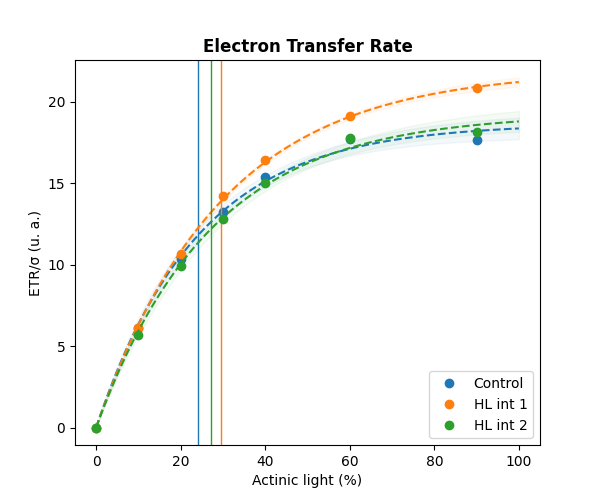

In [52]:
fig, ax = plt.subplots(figsize = (6,5))
ax.set_title("Electron Transfer Rate", fontweight = 'bold')

all_Ek = []
all_Ek_err = []

for i, result in enumerate(results):
    ETR = result.ETR
    light = result.Actinic
    ax.plot(light, ETR, 'o', label = labels[i], color = f"C{i}")
    
    popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR, 0, 100, 100, p0 = [15, 20])
    err = tools.my_err(xfit, popt, pcov, mf.Ek)
    ax.fill_between(xfit, yfit - 1.94*err, yfit + 1.94*err, alpha=0.05, color = f"C{i}")
    ax.plot(xfit, yfit, '--', color =f"C{i}", linewidth = 1.5)
    Ek = popt[1]
    Ek_err = np.sqrt(np.diag(pcov))[1]
    
    all_Ek.append(Ek)
    all_Ek_err.append(Ek_err)
    
    ax.axvline(x=Ek, color=f"C{i}", linewidth=1)


ax.legend(loc = 'lower right')

ax.set_xlabel("Actinic light (%)")
ax.set_ylabel("ETR/σ (u. a.)")


NameError: name 'manip' is not defined

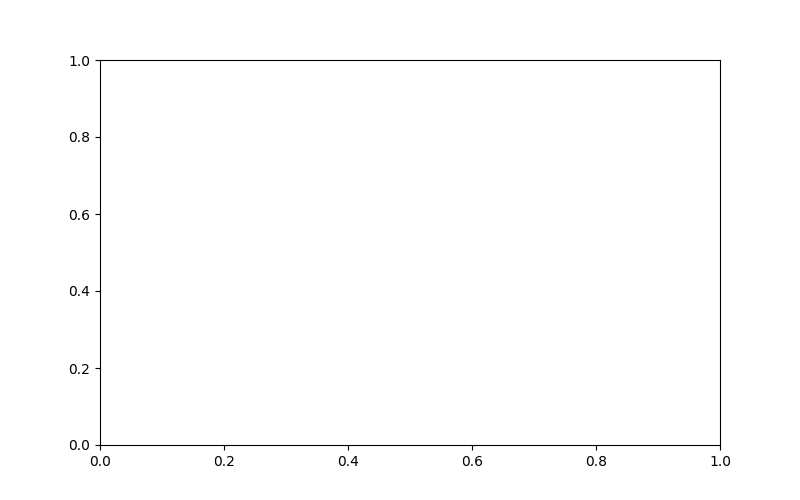

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))
start = tools.closest_index(manip.Time, 35)
end = tools.closest_index(manip.Time, 35.12)
time = (manip.Time[start:end]-manip.Time[start])*1000
for i, k in enumerate(manip.records[::-1]):
    ax.semilogx(time, manip.Data[k][start:end], 'o-', markersize = 1, linewidth = 0.5, label = f"{Intensities[i]}%")

ax.set_ylim(0.2, 0.5)
ylim = ax.get_ylim()
ax.fill_betweenx(ylim, 4, 7, color = 'k', alpha = 0.1)
ax.fill_betweenx(ylim, 100, 120, color = 'k', alpha = 0.1)
ax.legend(title = "Actinic light intensity", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.text(3, 0.22, "Calcule Fmax OJ", fontsize = 10)
ax.text(38, 0.22, "Calcule Fmax OJIP", fontsize = 10)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Fluorescence (a.u.)')
ax.set_title('Saturating pulses', fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{manip.fig_folder}/Sat_pulse_log.png", dpi=300)


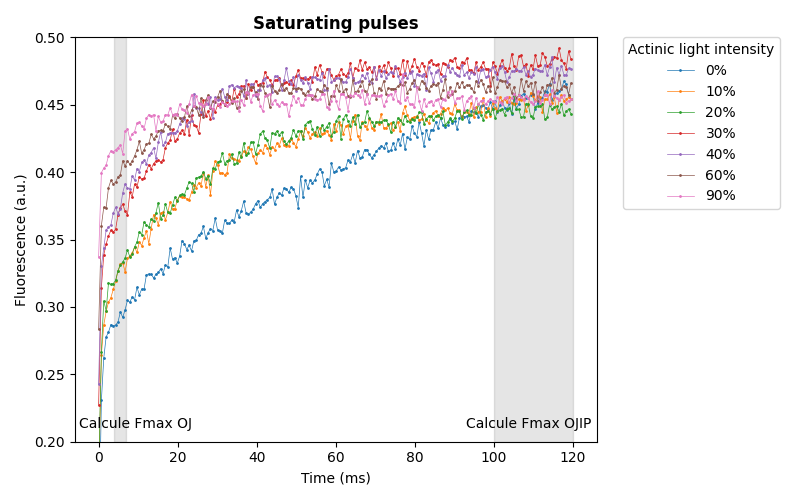

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
start = tools.closest_index(manip.Time, 35)
end = tools.closest_index(manip.Time, 35.12)
time = (manip.Time[start:end]-manip.Time[start])*1000
for i, k in enumerate(manip.records[::-1]):
    ax.plot(time, manip.Data[k][start:end], 'o-', markersize = 1, linewidth = 0.5, label = f"{Intensities[i]}%")

ax.set_ylim(0.2, 0.5)
ylim = ax.get_ylim()
ax.fill_betweenx(ylim, 4, 7, color = 'k', alpha = 0.1)
ax.fill_betweenx(ylim, 100, 120, color = 'k', alpha = 0.1)
ax.legend(title = "Actinic light intensity", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.text(-5, 0.21, "Calcule Fmax OJ", fontsize = 10)
ax.text(93, 0.21, "Calcule Fmax OJIP", fontsize = 10)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Fluorescence (a.u.)')
ax.set_title('Saturating pulses', fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{manip.fig_folder}/Sat_pulse.png", dpi=300)
